In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### GETTING HISTORIC DATA

In [2]:
asset = ['BTC-USD']

In [3]:
asset_data = yf.download(asset,start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


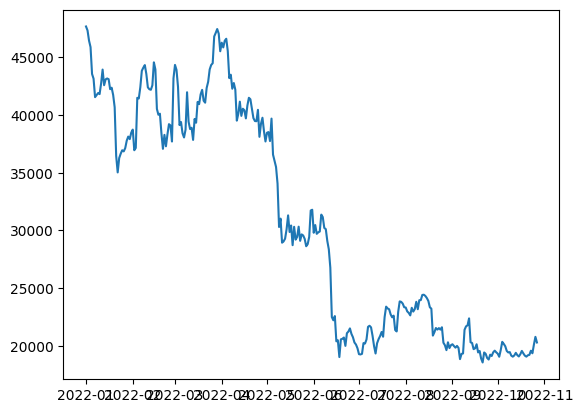

In [4]:
plt.plot(asset_data.Close)

In [78]:
def get_historic_price():
    """
    get historic price data via yahoo finance
    """
    
    asset = ['xrp-usd']
    asset_data = yf.download(asset,start='2020-01-01')
    return asset_data

In [79]:
df = get_historic_price()

[*********************100%***********************]  1 of 1 completed


In [80]:
df.index.astype(str)

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
       '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27'],
      dtype='object', name='Date', length=1031)

In [95]:
df.columns = df.columns.str.lower()

In [96]:
df.shape

(1031, 10)

In [97]:
df.head()

,open,high,low,close,adj close,volume,test_date,day,month,year
Date,,,,,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020


### visualization

In [98]:
df['test_date'] = df.index

In [99]:
df['test_date'] = pd.to_datetime(df.test_date)

In [100]:
df["day"] = df['test_date'].map(lambda x: x.day)
df["month"] = df['test_date'].map(lambda x: x.month)
df["year"] = df['test_date'].map(lambda x: x.year)

In [101]:
df

,open,high,low,close,adj close,volume,test_date,day,month,year
Date,,,,,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...
2022-10-23,0.465490,0.471006,0.453438,0.469033,0.469033,950974305,2022-10-23,23,10,2022
2022-10-24,0.469037,0.470982,0.449691,0.453821,0.453821,1293537737,2022-10-24,24,10,2022
2022-10-25,0.453807,0.471014,0.445384,0.461544,0.461544,1605966218,2022-10-25,25,10,2022


- The data is from yahoo finance so it doesnt need much augmentation
- we will check if the asset shows seaonality or obvious trends using statsmodels

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [120]:
res = seasonal_decompose(df.close,model='muplicative')

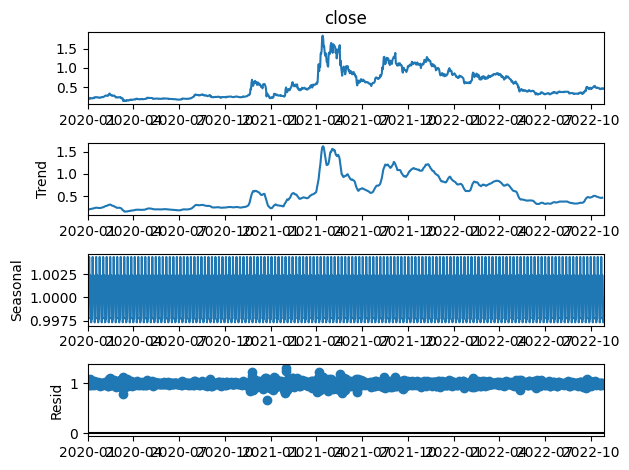

In [121]:
# the below doesnt show any trend to report on and seasonlity is also not clearly present
res.plot();

### ill return these in a function to plot on the dashboard

In [122]:
res.trend

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.199936
2020-01-05    0.202273
                ...   
2022-10-23    0.461204
2022-10-24    0.463244
2022-10-25         NaN
2022-10-26         NaN
2022-10-27         NaN
Name: trend, Length: 1031, dtype: float64

In [123]:
res.seasonal

Date
2020-01-01    0.997315
2020-01-02    0.997820
2020-01-03    0.997707
2020-01-04    1.004382
2020-01-05    0.999460
                ...   
2022-10-23    0.999460
2022-10-24    1.002412
2022-10-25    1.000902
2022-10-26    0.997315
2022-10-27    0.997820
Name: seasonal, Length: 1031, dtype: float64

In [124]:
res.resid

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.967846
2020-01-05    0.967222
                ...   
2022-10-23    1.017525
2022-10-24    0.977301
2022-10-25         NaN
2022-10-26         NaN
2022-10-27         NaN
Name: resid, Length: 1031, dtype: float64

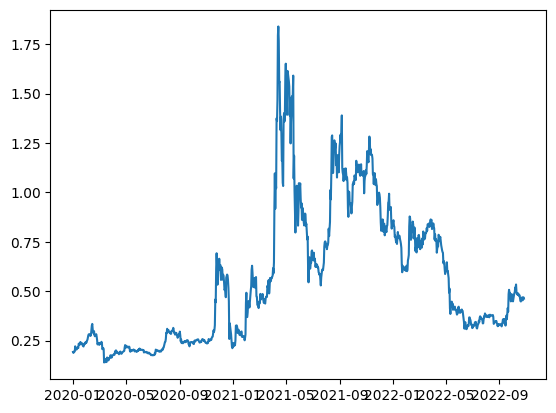

In [87]:
#overall price movement
plt.plot(df.Close)

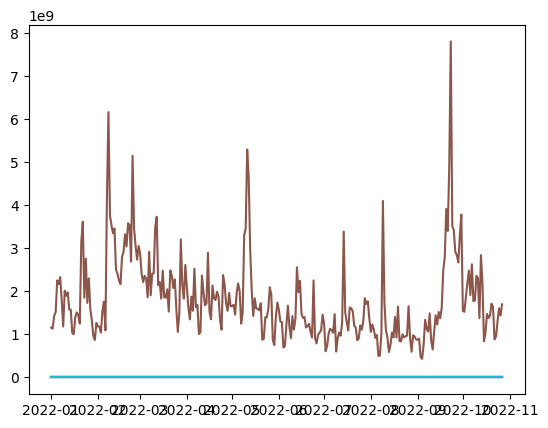

In [88]:
plt.plot(df[df.year==2022])

#### First we'll test for stationarity using the Dickey Fuller from statsmodels
- if p<0.5:
    - Data is Stationary 
- elif p>0.5 :
    - Data is Not Stationary
- else:
    - idk

In [129]:
#the data is stationary so ill continue to modeling
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
     dftest = adfuller(df, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\n",key, ": ", val)
        
adf_test(df.close)

1. ADF :  -2.3228237818985225
2. P-Value :  0.16471246708037196
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 1009
5. Critical Values :

 1% :  -3.4368475364676088

 5% :  -2.86440871710881

 10% :  -2.568297437011397


In [130]:
# we'll use 3 models linear regression, ARIMA, and a NN

### ARIMA MODELING